In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('test.csv')

Dropping First column, land area ones since they came as blank

In [11]:
df.drop(columns = ['Unnamed: 0','population per square mile','land area in square miles'],inplace=True)

In [12]:
df.head()

,city,state,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,...,avg household income,per capita income in last 12 months,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses
0,Birmingham,Alabama,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,...,35346,22993,27.2,20738,10318,8286,10605,8770,2082,17113
1,Montgomery,Alabama,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,...,45921,27172,21.9,18043,8879,7459,8793,8363,2352,14434
2,Mobile,Alabama,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,...,40588,26023,22.0,20118,9703,8644,8808,10250,2275,16639
3,Huntsville,Alabama,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,...,53840,34589,17.7,16838,8211,6565,4380,11515,1816,13915
4,Tuscaloosa,Alabama,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,...,44120,25364,24.2,6802,3374,2530,1953,4375,670,5438


In [13]:
df.shape

(10, 45)

In [16]:
df.columns

Index(['city', 'state', 'political affiliation', 'population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelor's degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household in

We dont need city or state anymore as they are just identifiers and potentially overpower local politics too much

In [17]:
df.drop(columns = ['city','state'],inplace=True)





Checking for class imbalance

In [18]:
df['political affiliation'].value_counts()

liberal         7
conservative    3
Name: political affiliation, dtype: int64

Checking for null values

In [19]:
df.isnull().sum()

political affiliation                                0
population                                           0
people under age 5                                   0
people under age 18                                  0
people 65 and older                                  0
female                                               0
white                                                0
black                                                0
american indian or alaska native                     0
asian                                                0
native hawaiian and other pacific islander           0
2+ races                                             0
hispanic                                             0
veteran                                              0
foreign born                                         0
owner occupied houses                                0
avg value of owner occupied houses                   0
avg rent                                             0
households

In [40]:
df.head()


(4884, 3)

Currently all of our data types are continuous, many of these we will
later bucket and categorize but first we'll take a look at the distributions


In [36]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 43 columns):
political affiliation                                10 non-null object
population                                           10 non-null int64
people under age 5                                   10 non-null float64
people under age 18                                  10 non-null float64
people 65 and older                                  10 non-null float64
female                                               10 non-null float64
white                                                10 non-null float64
black                                                10 non-null float64
american indian or alaska native                     10 non-null float64
asian                                                10 non-null float64
native hawaiian and other pacific islander           10 non-null float64
2+ races                                             10 non-null float64
hispanic                 

## Outliers
Currently all of our features are continuous. We'll start looking at these in detail

In [33]:
df.rename(columns={"bachelor's degree or higher, 25+": 'bachelors degree or higher, 25+'},inplace=True)

In [42]:
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'men owned businesses', 'female owned businesses',
       'minority owned businesses', 'nonminority owned businesses',
       'veteran owned businesses', 'nonveteran owned businesses']
for column in continuous:
    print(df[column].describe())
    print('\n')

count        10.000000
mean     121989.800000
std       67767.524649
min       50440.000000
25%       66365.250000
50%       93110.500000
75%      195381.500000
max      209880.000000
Name: population, dtype: float64


count    10.000000
mean      6.160000
std       0.671979
min       4.900000
25%       6.000000
50%       6.350000
75%       6.500000
max       6.900000
Name: people under age 5, dtype: float64


count    10.000000
mean     22.070000
std       2.421226
min      18.300000
25%      20.500000
50%      22.400000
75%      23.900000
max      25.400000
Name: people under age 18, dtype: float64


count    10.000000
mean     14.010000
std       3.209171
min       7.500000
25%      12.200000
50%      14.900000
75%      15.925000
max      17.800000
Name: people 65 and older, dtype: float64


count    10.00000
mean     52.20000
std       1.00995
min      50.20000
25%      52.02500
50%      52.60000
75%      52.80000
max      53.10000
Name: female, dtype: float64


count    10.000000


With Outliers:


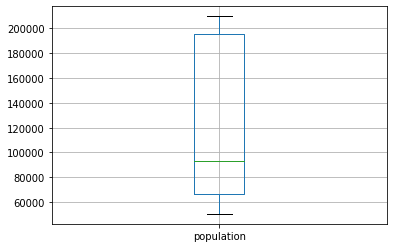

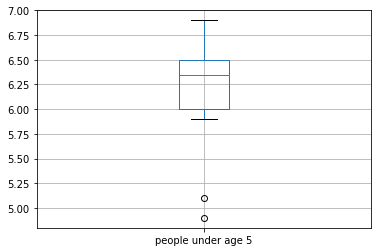

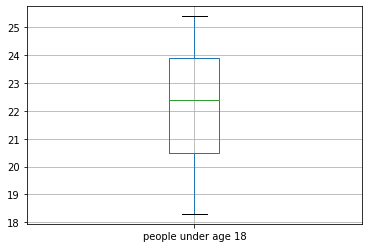

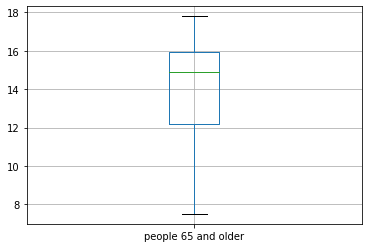

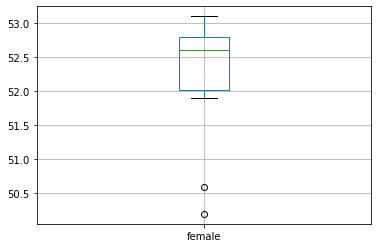

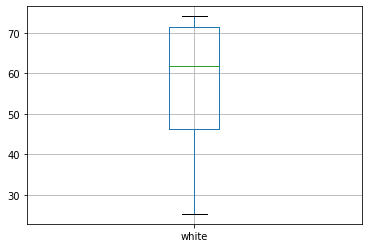

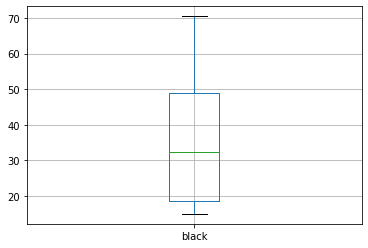

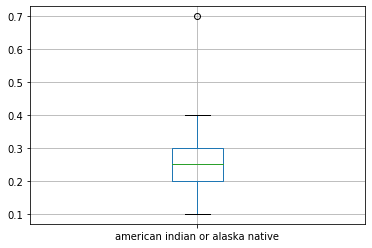

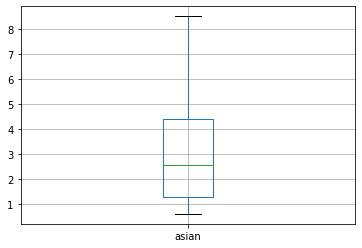

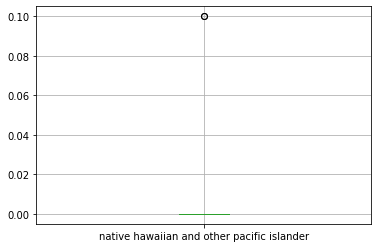

In [ ]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [43]:
df.columns

Index(['political affiliation', 'population', 'people under age 5',
       'people under age 18', 'people 65 and older', 'female', 'white',
       'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household income',
       'per